In [3]:
import os 
import pandas as pd
import numpy as np
rootdir = "C:/Users/compf/Documents/Diploma/data/2023/master/"
os.chdir(rootdir) 

In [3]:
# data = {'text': ['None'],
#         'institute': ['None'],
#         'lvl': ['None'],
#         'year': ['None']}
# df = pd.DataFrame(data)
 

In [11]:
!conda deactivate

In [65]:
for subdir, dirs, files in os.walk(rootdir):
    for file in files:

            if file.endswith(".txt"): 
                file_path = f"{os.path.join(subdir, file)}"
                new_row = {'text': read_text_file(file_path) , 'institute': os.path.basename(subdir), 'lvl': 'master', 'year': 2023}
 
                # Use the loc method to add the new row to the DataFrame
                df.loc[len(df)] = new_row
                
#                         print(f.read())
#                     except:
#                         print(f.decode())

In [66]:
df

,text,institute,lvl,year
0,None,None,None,None
1,ВВЕДЕНИЕ Оптическая когерентная томография – м...,инженерно-исследовательский факультет,bachelor,2022
2,ВВЕДЕНИЕ В жизни современного россиянина автом...,инженерно-исследовательский факультет,bachelor,2022
3,ВВЕДЕНИЕ При конвейерной сборке продукции из-з...,инженерно-исследовательский факультет,bachelor,2022
4,ВВЕДЕНИЕ 1.1 . Цели и задачи Цель : Разработка...,инженерно-исследовательский факультет,bachelor,2022
...,...,...,...,...
5891,ВВЕДЕНИЕ Сброс нефтесодержащих сточных вод явл...,центр химической инженерии,master,2023
5892,ВВЕДЕНИЕ Актуальной задачей при разработке и э...,центр химической инженерии,master,2023
5893,,центр химической инженерии,master,2023
5894,СОДЕРЖАНИЕ ВВЕДЕНИЕ .............................,центр химической инженерии,master,2023


In [71]:
df.to_csv('diploma_data.csv')

In [4]:
df = pd.read_csv('C:/Users/compf/Documents/Diploma/data/2022/bachelor/инженерно-исследовательский факультет/diploma_data.csv')  

In [5]:
df

,Unnamed: 0,text,institute,lvl,year
0,0,None,None,None,None
1,1,ВВЕДЕНИЕ Оптическая когерентная томография – м...,инженерно-исследовательский факультет,bachelor,2022
2,2,ВВЕДЕНИЕ В жизни современного россиянина автом...,инженерно-исследовательский факультет,bachelor,2022
3,3,ВВЕДЕНИЕ При конвейерной сборке продукции из-з...,инженерно-исследовательский факультет,bachelor,2022
4,4,ВВЕДЕНИЕ 1.1 . Цели и задачи Цель : Разработка...,инженерно-исследовательский факультет,bachelor,2022
...,...,...,...,...,...
5891,5891,ВВЕДЕНИЕ Сброс нефтесодержащих сточных вод явл...,центр химической инженерии,master,2023
5892,5892,ВВЕДЕНИЕ Актуальной задачей при разработке и э...,центр химической инженерии,master,2023
5893,5893,NaN,центр химической инженерии,master,2023
5894,5894,СОДЕРЖАНИЕ ВВЕДЕНИЕ .............................,центр химической инженерии,master,2023


In [306]:
df = df.sample(frac=1).reset_index(drop=True)

In [309]:
df['text'][0]

"ВВЕДЕНИЕ Маркетинг является неотъемлемой частью нашей жизни . Будь то продажа продукта или услуги , маркетинговая стратегия для привлечения клиентов важна для любого бизнеса . Требуется много усилий , чтобы эффективно предложить и продать продукт или услугу большому количеству потенциальных клиентов и заказчиков . Специалисты должны иметь хорошие навыки планирования и организации , а также способность разрабатывать подходящие стратегии , проводить анализ рынка и конкурентов , определять целевую аудиторию и следить за маркетинговыми тенденциями . Кроме того , работа в отделе маркетинга требует хорошего творческого подхода и готовности исследовать новые оригинальные способы создания и распространения своих идей . Одним из эффективных инструментов работы с идеями являются интеллект-карты ( с англ . mind map ) . Интеллект-карта – графический метод организации информации и нахождении связи между её частями . Такой подход к структуризации понятий остаётся актуальным по сей день , так как он

In [311]:
summary_df = df['text']

In [282]:
def string_remove(text, string):
    try:
        # initializing sub string
        sub_str = string
       

        # slicing off after length computation
        return text[:text.index(sub_str)]
    except:
        return text

In [284]:
df["text_clean"] = df["text_clean"].apply(lambda x: string_remove(x, 'список литературы'))

In [288]:
df["text_clean"] = df["text_clean"].apply(lambda x: string_remove(x, 'список использованных источников'))

In [326]:
def string_cut(text):
    try:
        
        return text.split("\n\n")
    except:
        return text

In [327]:
df["parts"] = df["text"].apply(lambda x: string_cut(x))


In [354]:
df["parts"][0][0]

'ВВЕДЕНИЕ Маркетинг является неотъемлемой частью нашей жизни . Будь то продажа продукта или услуги , маркетинговая стратегия для привлечения клиентов важна для любого бизнеса . Требуется много усилий , чтобы эффективно предложить и продать продукт или услугу большому количеству потенциальных клиентов и заказчиков . Специалисты должны иметь хорошие навыки планирования и организации , а также способность разрабатывать подходящие стратегии , проводить анализ рынка и конкурентов , определять целевую аудиторию и следить за маркетинговыми тенденциями . Кроме того , работа в отделе маркетинга требует хорошего творческого подхода и готовности исследовать новые оригинальные способы создания и распространения своих идей . Одним из эффективных инструментов работы с идеями являются интеллект-карты ( с англ . mind map ) . Интеллект-карта – графический метод организации информации и нахождении связи между её частями . Такой подход к структуризации понятий остаётся актуальным по сей день , так как он

878

In [344]:
len(df["text"][5])

133104

In [6]:
!pip install nltk

In [265]:
import string
import re
import nltk

In [337]:
df["text_clean_parts"] = df["parts"].apply(lambda x: [str(i).lower() for i in x] if isinstance(x, list) else str(x).lower())
display(df.head())

,Unnamed: 0,text,institute,lvl,year,text_clean,tokenized,stopwords_removed,snowball_stemmer,stemmer_stopwords_removed,len,introduction,main_part,parts,text_clean_parts
0,156,ВВЕДЕНИЕ Маркетинг является неотъемлемой часть...,факультет инфокоммуникационных технологий,bachelor,2022,введение маркетинг является неотъемлемой часть...,"[введение, маркетинг, является, неотъемлемой, ...","[введение, маркетинг, является, неотъемлемой, ...","[введен, маркетинг, явля, неотъемлем, част, на...","[введен, маркетинг, явля, неотъемлем, част, на...",8444,ВВЕДЕНИЕ Маркетинг является неотъемлемой часть...,ВВЕДЕНИЕ Маркетинг является неотъемлемой часть...,[ВВЕДЕНИЕ Маркетинг является неотъемлемой част...,[введение маркетинг является неотъемлемой част...
1,3729,ВВЕДЕНИЕ Современное приборостроительное произ...,факультет систем управления и робототехники,bachelor,2023,введение современное приборостроительное произ...,"[введение, современное, приборостроительное, п...","[введение, современное, приборостроительное, п...","[введен, современ, приборостроительн, производ...","[введен, современ, приборостроительн, производ...",3671,ВВЕДЕНИЕ Современное приборостроительное произ...,ВВЕДЕНИЕ Современное приборостроительное произ...,[ВВЕДЕНИЕ Современное приборостроительное прои...,[введение современное приборостроительное прои...
2,1314,ВВЕДЕНИЕ В настоящее время быстрота и доступно...,факультет инфокоммуникационных технологий,master,2022,введение в настоящее время быстрота и доступно...,"[введение, в, настоящее, время, быстрота, и, д...","[введение, настоящее, время, быстрота, доступн...","[введен, настоя, врем, быстрот, доступн, инфор...","[введен, настоя, врем, быстрот, доступн, инфор...",4993,ВВЕДЕНИЕ В настоящее время быстрота и доступно...,ВВЕДЕНИЕ В настоящее время быстрота и доступно...,[ВВЕДЕНИЕ В настоящее время быстрота и доступн...,[введение в настоящее время быстрота и доступн...
3,2086,ВВЕДЕНИЕ Последние десятилетия общество активн...,факультет технологического менеджмента и иннов...,master,2022,введение последние десятилетия общество активн...,"[введение, последние, десятилетия, общество, а...","[введение, последние, десятилетия, общество, а...","[введен, последн, десятилет, обществ, активн, ...","[введен, последн, десятилет, обществ, активн, ...",11790,ВВЕДЕНИЕ Последние десятилетия общество активн...,ВВЕДЕНИЕ Последние десятилетия общество активн...,[ВВЕДЕНИЕ Последние десятилетия общество актив...,[введение последние десятилетия общество актив...
4,1310,ВВЕДЕНИЕ С развитием отрасли инфокоммуникацион...,факультет инфокоммуникационных технологий,master,2022,введение с развитием отрасли инфокоммуникацион...,"[введение, с, развитием, отрасли, инфокоммуник...","[введение, развитием, отрасли, инфокоммуникаци...","[введен, развит, отрасл, инфокоммуникацион, ус...","[введен, развит, отрасл, инфокоммуникацион, ус...",6881,ВВЕДЕНИЕ С развитием отрасли инфокоммуникацион...,ВВЕДЕНИЕ С развитием отрасли инфокоммуникацион...,[ВВЕДЕНИЕ С развитием отрасли инфокоммуникацио...,[введение с развитием отрасли инфокоммуникацио...


In [339]:
df["text_clean_parts"][0][0]

'введение маркетинг является неотъемлемой частью нашей жизни . будь то продажа продукта или услуги , маркетинговая стратегия для привлечения клиентов важна для любого бизнеса . требуется много усилий , чтобы эффективно предложить и продать продукт или услугу большому количеству потенциальных клиентов и заказчиков . специалисты должны иметь хорошие навыки планирования и организации , а также способность разрабатывать подходящие стратегии , проводить анализ рынка и конкурентов , определять целевую аудиторию и следить за маркетинговыми тенденциями . кроме того , работа в отделе маркетинга требует хорошего творческого подхода и готовности исследовать новые оригинальные способы создания и распространения своих идей . одним из эффективных инструментов работы с идеями являются интеллект-карты ( с англ . mind map ) . интеллект-карта – графический метод организации информации и нахождении связи между её частями . такой подход к структуризации понятий остаётся актуальным по сей день , так как он

In [267]:
def remove_URL(text):
    """
        Remove URLs from a sample string
    """
    return re.sub(r"https?://\S+|www\.\S+", "", text)

In [268]:
# # remove urls from the text
# df["text_clean"] = df["text_clean"].apply(lambda x: remove_URL(x))
# display(df.head())

,Unnamed: 0,text,institute,lvl,year,text_clean,tokenized,stopwords_removed,snowball_stemmer,stemmer_stopwords_removed,len
1,1,ВВЕДЕНИЕ Оптическая когерентная томография – м...,инженерно-исследовательский факультет,bachelor,2022,введение оптическая когерентная томография – м...,"[введение, оптическая, когерентная, томография...","[введение, оптическая, когерентная, томография...","[введен, оптическ, когерентн, томограф, –, мет...","[введен, оптическ, когерентн, томограф, метод,...",3330
2,2,ВВЕДЕНИЕ В жизни современного россиянина автом...,инженерно-исследовательский факультет,bachelor,2022,введение в жизни современного россиянина автом...,"[введение, в, жизни, современного, россиянина,...","[введение, жизни, современного, россиянина, ав...","[введен, жизн, современ, россиянин, автомобил,...","[введен, жизн, современ, россиянин, автомобил,...",3752
3,3,ВВЕДЕНИЕ При конвейерной сборке продукции из-з...,инженерно-исследовательский факультет,bachelor,2022,введение при конвейерной сборке продукции из-з...,"[введение, при, конвейерной, сборке, продукции...","[введение, конвейерной, сборке, продукции, изз...","[введен, конвейерн, сборк, продукц, изз, част,...","[введен, конвейерн, сборк, продукц, изз, част,...",6379
4,4,ВВЕДЕНИЕ 1.1 . Цели и задачи Цель : Разработка...,инженерно-исследовательский факультет,bachelor,2022,введение 1.1 . цели и задачи цель : разработка...,"[введение, 11, цели, и, задачи, цель, разработ...","[введение, 11, цели, задачи, цель, разработка,...","[введен, 11, цел, задач, цел, разработк, алгор...","[введен, 11, цел, задач, цел, разработк, алгор...",6367
5,5,ВВЕДЕНИЕ Кольцевые энкодеры представляют собой...,инженерно-исследовательский факультет,bachelor,2022,введение кольцевые энкодеры представляют собой...,"[введение, кольцевые, энкодеры, представляют, ...","[введение, кольцевые, энкодеры, представляют, ...","[введен, кольцев, энкодер, представля, соб, уг...","[введен, кольцев, энкодер, представля, соб, уг...",4442


In [269]:
def remove_html(text):
    """
        Remove the html in sample text
    """
    html = re.compile(r"<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});")
    return re.sub(html, "", text)

In [270]:
# # remove html from the text
# df["text_clean"] = df["text_clean"].apply(lambda x: remove_html(x))
# display(df.head())

,Unnamed: 0,text,institute,lvl,year,text_clean,tokenized,stopwords_removed,snowball_stemmer,stemmer_stopwords_removed,len
1,1,ВВЕДЕНИЕ Оптическая когерентная томография – м...,инженерно-исследовательский факультет,bachelor,2022,введение оптическая когерентная томография – м...,"[введение, оптическая, когерентная, томография...","[введение, оптическая, когерентная, томография...","[введен, оптическ, когерентн, томограф, –, мет...","[введен, оптическ, когерентн, томограф, метод,...",3330
2,2,ВВЕДЕНИЕ В жизни современного россиянина автом...,инженерно-исследовательский факультет,bachelor,2022,введение в жизни современного россиянина автом...,"[введение, в, жизни, современного, россиянина,...","[введение, жизни, современного, россиянина, ав...","[введен, жизн, современ, россиянин, автомобил,...","[введен, жизн, современ, россиянин, автомобил,...",3752
3,3,ВВЕДЕНИЕ При конвейерной сборке продукции из-з...,инженерно-исследовательский факультет,bachelor,2022,введение при конвейерной сборке продукции из-з...,"[введение, при, конвейерной, сборке, продукции...","[введение, конвейерной, сборке, продукции, изз...","[введен, конвейерн, сборк, продукц, изз, част,...","[введен, конвейерн, сборк, продукц, изз, част,...",6379
4,4,ВВЕДЕНИЕ 1.1 . Цели и задачи Цель : Разработка...,инженерно-исследовательский факультет,bachelor,2022,введение 1.1 . цели и задачи цель : разработка...,"[введение, 11, цели, и, задачи, цель, разработ...","[введение, 11, цели, задачи, цель, разработка,...","[введен, 11, цел, задач, цел, разработк, алгор...","[введен, 11, цел, задач, цел, разработк, алгор...",6367
5,5,ВВЕДЕНИЕ Кольцевые энкодеры представляют собой...,инженерно-исследовательский факультет,bachelor,2022,введение кольцевые энкодеры представляют собой...,"[введение, кольцевые, энкодеры, представляют, ...","[введение, кольцевые, энкодеры, представляют, ...","[введен, кольцев, энкодер, представля, соб, уг...","[введен, кольцев, энкодер, представля, соб, уг...",4442


In [271]:
def remove_non_ascii(text):
    """
        Remove non-ASCII characters 
    """
    return re.sub(r'[^\x00-\x7f]',r'', text) # or ''.join([x for x in text if x in string.printable]) 

In [272]:
# # remove non-ascii characters from the text
# df["text_clean"] = df["text_clean"].apply(lambda x: remove_non_ascii(x))
# display(df.head())

In [273]:
def remove_punct(text):
    """
        Remove the punctuation
    """
#     return re.sub(r'[]!"$%&\'()*+,./:;=#@?[\\^_`{|}~-]+', "", text)
    return text.translate(str.maketrans('', '', string.punctuation))

In [ ]:
def remove_punct_from_list(arr):
    # функция для удаления пунктуации из последнего элемента массива
    arr[-1] = remove_punct(arr[-1])
    return arr

In [ ]:
df["text_clean_parts"] = df["text_clean_parts"].apply(lambda x: remove_punct(x[:-1]))

In [291]:
# remove punctuations from the text
df["text_clean_parts"] = df["text_clean_parts"].apply(lambda x: remove_punct(x))
display(df.head())

,Unnamed: 0,text,institute,lvl,year,text_clean,tokenized,stopwords_removed,snowball_stemmer,stemmer_stopwords_removed,len
1,1,ВВЕДЕНИЕ Оптическая когерентная томография – м...,инженерно-исследовательский факультет,bachelor,2022,введение оптическая когерентная томография – м...,"[введение, оптическая, когерентная, томография...","[введение, оптическая, когерентная, томография...","[введен, оптическ, когерентн, томограф, –, мет...","[введен, оптическ, когерентн, томограф, метод,...",3330
2,2,ВВЕДЕНИЕ В жизни современного россиянина автом...,инженерно-исследовательский факультет,bachelor,2022,введение в жизни современного россиянина автом...,"[введение, в, жизни, современного, россиянина,...","[введение, жизни, современного, россиянина, ав...","[введен, жизн, современ, россиянин, автомобил,...","[введен, жизн, современ, россиянин, автомобил,...",3752
3,3,ВВЕДЕНИЕ При конвейерной сборке продукции из-з...,инженерно-исследовательский факультет,bachelor,2022,введение при конвейерной сборке продукции изза...,"[введение, при, конвейерной, сборке, продукции...","[введение, конвейерной, сборке, продукции, изз...","[введен, конвейерн, сборк, продукц, изз, част,...","[введен, конвейерн, сборк, продукц, изз, част,...",6379
4,4,ВВЕДЕНИЕ 1.1 . Цели и задачи Цель : Разработка...,инженерно-исследовательский факультет,bachelor,2022,введение 11 цели и задачи цель разработка ал...,"[введение, 11, цели, и, задачи, цель, разработ...","[введение, 11, цели, задачи, цель, разработка,...","[введен, 11, цел, задач, цел, разработк, алгор...","[введен, 11, цел, задач, цел, разработк, алгор...",6367
5,5,ВВЕДЕНИЕ Кольцевые энкодеры представляют собой...,инженерно-исследовательский факультет,bachelor,2022,введение кольцевые энкодеры представляют собой...,"[введение, кольцевые, энкодеры, представляют, ...","[введение, кольцевые, энкодеры, представляют, ...","[введен, кольцев, энкодер, представля, соб, уг...","[введен, кольцев, энкодер, представля, соб, уг...",4442


In [292]:
df["text_clean"][1]

'введение оптическая когерентная томография – метод неинвазивного исследования внутренней структуры неоднородных сред  разрешение и глубина сканирования объектов в окт часто превосходят характеристики существующих оптических и других методов исследований  1 – 13   принцип окт состоит в освещении объекта оптическим излучением с определением степени отражения излучения по глубине среды  при освещении объекта оптическое излучение проникает в среду на глубину до нескольких миллиметров  и для получения информации о внутренней микроструктуре среды необходимо определить степень отражения от каждого отдельного слоя  1 – 13   оптическая томография широко используется в медицине и материаловедении  целью данной работы является модернизация оптической и механической части интерферометра полного поля  а также разработка методики измерений динамики изменения свойств биологических объектов in vivo  в данный момент приборы окт регистрируют отраженный сигнал в области сканирования и представляют в вид

In [18]:
df["text_clean"] = df["text_clean"].split()
display(df.head())

AttributeError: 'Series' object has no attribute 'split'

In [293]:
# Tokenizing the tweet base texts.
from nltk.tokenize import word_tokenize

df['tokenized'] = df['text_clean'].apply(word_tokenize)
df.head()

,Unnamed: 0,text,institute,lvl,year,text_clean,tokenized,stopwords_removed,snowball_stemmer,stemmer_stopwords_removed,len
1,1,ВВЕДЕНИЕ Оптическая когерентная томография – м...,инженерно-исследовательский факультет,bachelor,2022,введение оптическая когерентная томография – м...,"[введение, оптическая, когерентная, томография...","[введение, оптическая, когерентная, томография...","[введен, оптическ, когерентн, томограф, –, мет...","[введен, оптическ, когерентн, томограф, метод,...",3330
2,2,ВВЕДЕНИЕ В жизни современного россиянина автом...,инженерно-исследовательский факультет,bachelor,2022,введение в жизни современного россиянина автом...,"[введение, в, жизни, современного, россиянина,...","[введение, жизни, современного, россиянина, ав...","[введен, жизн, современ, россиянин, автомобил,...","[введен, жизн, современ, россиянин, автомобил,...",3752
3,3,ВВЕДЕНИЕ При конвейерной сборке продукции из-з...,инженерно-исследовательский факультет,bachelor,2022,введение при конвейерной сборке продукции изза...,"[введение, при, конвейерной, сборке, продукции...","[введение, конвейерной, сборке, продукции, изз...","[введен, конвейерн, сборк, продукц, изз, част,...","[введен, конвейерн, сборк, продукц, изз, част,...",6379
4,4,ВВЕДЕНИЕ 1.1 . Цели и задачи Цель : Разработка...,инженерно-исследовательский факультет,bachelor,2022,введение 11 цели и задачи цель разработка ал...,"[введение, 11, цели, и, задачи, цель, разработ...","[введение, 11, цели, задачи, цель, разработка,...","[введен, 11, цел, задач, цел, разработк, алгор...","[введен, 11, цел, задач, цел, разработк, алгор...",6367
5,5,ВВЕДЕНИЕ Кольцевые энкодеры представляют собой...,инженерно-исследовательский факультет,bachelor,2022,введение кольцевые энкодеры представляют собой...,"[введение, кольцевые, энкодеры, представляют, ...","[введение, кольцевые, энкодеры, представляют, ...","[введен, кольцев, энкодер, представля, соб, уг...","[введен, кольцев, энкодер, представля, соб, уг...",4442


In [294]:
df['tokenized'][1][1]

'оптическая'

In [24]:
# Install the main polygot and other neccesary packages
!pip install pyicu
!pip install pycld2
!pip install polyglot

     -------------------------------------- 260.0/260.0 kB 1.3 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'


  error: subprocess-exited-with-error
  
  Getting requirements to build wheel did not run successfully.
  exit code: 1
  
  [58 lines of output]
  (running 'icu-config --version')
  (running 'pkg-config --modversion icu-i18n')
  Traceback (most recent call last):
    File "<string>", line 89, in <module>
    File "C:\Users\compf\AppData\Local\Programs\Python\Python39\lib\os.py", line 679, in __getitem__
      raise KeyError(key) from None
  KeyError: 'ICU_VERSION'
  
  During handling of the above exception, another exception occurred:
  
  Traceback (most recent call last):
    File "<string>", line 92, in <module>
    File "<string>", line 19, in check_output
    File "C:\Users\compf\AppData\Local\Programs\Python\Python39\lib\subprocess.py", line 424, in check_output
      return run(*popenargs, stdout=PIPE, timeout=timeout, check=True,
    File "C:\Users\compf\AppData\Local\Programs\Python\Python39\lib\subprocess.py", line 505, in run
      with Popen(*popenargs, **kwargs) as proce

     ---------------------------------------- 41.4/41.4 MB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for pycld2
Failed to build pycld2


  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [39 lines of output]
  running bdist_wheel
  The [wheel] section is deprecated. Use [bdist_wheel] instead.
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-3.9
  creating build\lib.win-amd64-3.9\pycld2
  copying pycld2\__init__.py -> build\lib.win-amd64-3.9\pycld2
  running build_ext
  building 'pycld2._pycld2' extension
  creating build\temp.win-amd64-3.9
  creating build\temp.win-amd64-3.9\Release
  creating build\temp.win-amd64-3.9\Release\Users
  creating build\temp.win-amd64-3.9\Release\Users\compf
  creating build\temp.win-amd64-3.9\Release\Users\compf\AppData
  creating build\temp.win-amd64-3.9\Release\Users\compf\AppData\Local
  creating build\temp.win-amd64-3.9\Release\Users\compf\AppData\Local\Temp
  creating build\temp.win-amd64-3.9\Release\Users\compf\AppData\Local\Temp\pip-install-5msk8d5q
  creating build\temp.win-amd64-3.9

In [295]:
# Removing stopwords.
nltk.download("stopwords")
from nltk.corpus import stopwords

stop = set(stopwords.words('russian')+stopwords.words('english'))
df['stopwords_removed'] = df['tokenized'].apply(lambda x: [word for word in x if word not in stop])
df.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\compf\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Unnamed: 0,text,institute,lvl,year,text_clean,tokenized,stopwords_removed,snowball_stemmer,stemmer_stopwords_removed,len
1,1,ВВЕДЕНИЕ Оптическая когерентная томография – м...,инженерно-исследовательский факультет,bachelor,2022,введение оптическая когерентная томография – м...,"[введение, оптическая, когерентная, томография...","[введение, оптическая, когерентная, томография...","[введен, оптическ, когерентн, томограф, –, мет...","[введен, оптическ, когерентн, томограф, метод,...",3330
2,2,ВВЕДЕНИЕ В жизни современного россиянина автом...,инженерно-исследовательский факультет,bachelor,2022,введение в жизни современного россиянина автом...,"[введение, в, жизни, современного, россиянина,...","[введение, жизни, современного, россиянина, ав...","[введен, жизн, современ, россиянин, автомобил,...","[введен, жизн, современ, россиянин, автомобил,...",3752
3,3,ВВЕДЕНИЕ При конвейерной сборке продукции из-з...,инженерно-исследовательский факультет,bachelor,2022,введение при конвейерной сборке продукции изза...,"[введение, при, конвейерной, сборке, продукции...","[введение, конвейерной, сборке, продукции, изз...","[введен, конвейерн, сборк, продукц, изз, част,...","[введен, конвейерн, сборк, продукц, изз, част,...",6379
4,4,ВВЕДЕНИЕ 1.1 . Цели и задачи Цель : Разработка...,инженерно-исследовательский факультет,bachelor,2022,введение 11 цели и задачи цель разработка ал...,"[введение, 11, цели, и, задачи, цель, разработ...","[введение, 11, цели, задачи, цель, разработка,...","[введен, 11, цел, задач, цел, разработк, алгор...","[введен, 11, цел, задач, цел, разработк, алгор...",6367
5,5,ВВЕДЕНИЕ Кольцевые энкодеры представляют собой...,инженерно-исследовательский факультет,bachelor,2022,введение кольцевые энкодеры представляют собой...,"[введение, кольцевые, энкодеры, представляют, ...","[введение, кольцевые, энкодеры, представляют, ...","[введен, кольцев, энкодер, представля, соб, уг...","[введен, кольцев, энкодер, представля, соб, уг...",4442


In [296]:
from nltk.stem.snowball import SnowballStemmer 

def snowball_stemmer(text):
    """
        Stem words in list of tokenized words with SnowballStemmer
    """
    stemmer = SnowballStemmer("russian") 
    stems = [stemmer.stem(i) for i in text]
    return stems

In [297]:
%time 

df['snowball_stemmer'] = df['stopwords_removed'].apply(lambda x: snowball_stemmer(x))
df.head()

CPU times: total: 0 ns
Wall time: 703 µs


,Unnamed: 0,text,institute,lvl,year,text_clean,tokenized,stopwords_removed,snowball_stemmer,stemmer_stopwords_removed,len
1,1,ВВЕДЕНИЕ Оптическая когерентная томография – м...,инженерно-исследовательский факультет,bachelor,2022,введение оптическая когерентная томография – м...,"[введение, оптическая, когерентная, томография...","[введение, оптическая, когерентная, томография...","[введен, оптическ, когерентн, томограф, –, мет...","[введен, оптическ, когерентн, томограф, метод,...",3330
2,2,ВВЕДЕНИЕ В жизни современного россиянина автом...,инженерно-исследовательский факультет,bachelor,2022,введение в жизни современного россиянина автом...,"[введение, в, жизни, современного, россиянина,...","[введение, жизни, современного, россиянина, ав...","[введен, жизн, современ, россиянин, автомобил,...","[введен, жизн, современ, россиянин, автомобил,...",3752
3,3,ВВЕДЕНИЕ При конвейерной сборке продукции из-з...,инженерно-исследовательский факультет,bachelor,2022,введение при конвейерной сборке продукции изза...,"[введение, при, конвейерной, сборке, продукции...","[введение, конвейерной, сборке, продукции, изз...","[введен, конвейерн, сборк, продукц, изз, част,...","[введен, конвейерн, сборк, продукц, изз, част,...",6379
4,4,ВВЕДЕНИЕ 1.1 . Цели и задачи Цель : Разработка...,инженерно-исследовательский факультет,bachelor,2022,введение 11 цели и задачи цель разработка ал...,"[введение, 11, цели, и, задачи, цель, разработ...","[введение, 11, цели, задачи, цель, разработка,...","[введен, 11, цел, задач, цел, разработк, алгор...","[введен, 11, цел, задач, цел, разработк, алгор...",6367
5,5,ВВЕДЕНИЕ Кольцевые энкодеры представляют собой...,инженерно-исследовательский факультет,bachelor,2022,введение кольцевые энкодеры представляют собой...,"[введение, кольцевые, энкодеры, представляют, ...","[введение, кольцевые, энкодеры, представляют, ...","[введен, кольцев, энкодер, представля, соб, уг...","[введен, кольцев, энкодер, представля, соб, уг...",4442


In [298]:
# Removing stopwords.
nltk.download("stopwords")
from nltk.corpus import stopwords

s='0123456789—−«»–'

punctuation = list(s) 
words = ['эт','котор', 'так', 'такж','https', 'url', '№', '10', 'т']
stop = set(punctuation+words)
df['stemmer_stopwords_removed'] = df['snowball_stemmer'].apply(lambda x: [word for word in x if word not in stop])
df.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\compf\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Unnamed: 0,text,institute,lvl,year,text_clean,tokenized,stopwords_removed,snowball_stemmer,stemmer_stopwords_removed,len
1,1,ВВЕДЕНИЕ Оптическая когерентная томография – м...,инженерно-исследовательский факультет,bachelor,2022,введение оптическая когерентная томография – м...,"[введение, оптическая, когерентная, томография...","[введение, оптическая, когерентная, томография...","[введен, оптическ, когерентн, томограф, –, мет...","[введен, оптическ, когерентн, томограф, метод,...",3330
2,2,ВВЕДЕНИЕ В жизни современного россиянина автом...,инженерно-исследовательский факультет,bachelor,2022,введение в жизни современного россиянина автом...,"[введение, в, жизни, современного, россиянина,...","[введение, жизни, современного, россиянина, ав...","[введен, жизн, современ, россиянин, автомобил,...","[введен, жизн, современ, россиянин, автомобил,...",3752
3,3,ВВЕДЕНИЕ При конвейерной сборке продукции из-з...,инженерно-исследовательский факультет,bachelor,2022,введение при конвейерной сборке продукции изза...,"[введение, при, конвейерной, сборке, продукции...","[введение, конвейерной, сборке, продукции, изз...","[введен, конвейерн, сборк, продукц, изз, част,...","[введен, конвейерн, сборк, продукц, изз, част,...",6379
4,4,ВВЕДЕНИЕ 1.1 . Цели и задачи Цель : Разработка...,инженерно-исследовательский факультет,bachelor,2022,введение 11 цели и задачи цель разработка ал...,"[введение, 11, цели, и, задачи, цель, разработ...","[введение, 11, цели, задачи, цель, разработка,...","[введен, 11, цел, задач, цел, разработк, алгор...","[введен, 11, цел, задач, цел, разработк, алгор...",6367
5,5,ВВЕДЕНИЕ Кольцевые энкодеры представляют собой...,инженерно-исследовательский факультет,bachelor,2022,введение кольцевые энкодеры представляют собой...,"[введение, кольцевые, энкодеры, представляют, ...","[введение, кольцевые, энкодеры, представляют, ...","[введен, кольцев, энкодер, представля, соб, уг...","[введен, кольцев, энкодер, представля, соб, уг...",4442


In [299]:
def count_length(text):
    return len(text)

In [300]:
df['len']=df['stemmer_stopwords_removed'].apply(count_length)

In [301]:
df

,Unnamed: 0,text,institute,lvl,year,text_clean,tokenized,stopwords_removed,snowball_stemmer,stemmer_stopwords_removed,len
1,1,ВВЕДЕНИЕ Оптическая когерентная томография – м...,инженерно-исследовательский факультет,bachelor,2022,введение оптическая когерентная томография – м...,"[введение, оптическая, когерентная, томография...","[введение, оптическая, когерентная, томография...","[введен, оптическ, когерентн, томограф, –, мет...","[введен, оптическ, когерентн, томограф, метод,...",2980
2,2,ВВЕДЕНИЕ В жизни современного россиянина автом...,инженерно-исследовательский факультет,bachelor,2022,введение в жизни современного россиянина автом...,"[введение, в, жизни, современного, россиянина,...","[введение, жизни, современного, россиянина, ав...","[введен, жизн, современ, россиянин, автомобил,...","[введен, жизн, современ, россиянин, автомобил,...",3420
3,3,ВВЕДЕНИЕ При конвейерной сборке продукции из-з...,инженерно-исследовательский факультет,bachelor,2022,введение при конвейерной сборке продукции изза...,"[введение, при, конвейерной, сборке, продукции...","[введение, конвейерной, сборке, продукции, изз...","[введен, конвейерн, сборк, продукц, изз, част,...","[введен, конвейерн, сборк, продукц, изз, част,...",6010
4,4,ВВЕДЕНИЕ 1.1 . Цели и задачи Цель : Разработка...,инженерно-исследовательский факультет,bachelor,2022,введение 11 цели и задачи цель разработка ал...,"[введение, 11, цели, и, задачи, цель, разработ...","[введение, 11, цели, задачи, цель, разработка,...","[введен, 11, цел, задач, цел, разработк, алгор...","[введен, 11, цел, задач, цел, разработк, алгор...",6367
5,5,ВВЕДЕНИЕ Кольцевые энкодеры представляют собой...,инженерно-исследовательский факультет,bachelor,2022,введение кольцевые энкодеры представляют собой...,"[введение, кольцевые, энкодеры, представляют, ...","[введение, кольцевые, энкодеры, представляют, ...","[введен, кольцев, энкодер, представля, соб, уг...","[введен, кольцев, энкодер, представля, соб, уг...",4449
...,...,...,...,...,...,...,...,...,...,...,...
5889,5889,ВВЕДЕНИЕ Актуальность темы исследования обусло...,центр химической инженерии,master,2023,введение актуальность темы исследования обусло...,"[введение, актуальность, темы, исследования, о...","[введение, актуальность, темы, исследования, о...","[введен, актуальн, тем, исследован, обусловл, ...","[введен, актуальн, тем, исследован, обусловл, ...",10625
5891,5891,ВВЕДЕНИЕ Сброс нефтесодержащих сточных вод явл...,центр химической инженерии,master,2023,введение сброс нефтесодержащих сточных вод явл...,"[введение, сброс, нефтесодержащих, сточных, во...","[введение, сброс, нефтесодержащих, сточных, во...","[введен, сброс, нефтесодержа, сточн, вод, явля...","[введен, сброс, нефтесодержа, сточн, вод, явля...",9611
5892,5892,ВВЕДЕНИЕ Актуальной задачей при разработке и э...,центр химической инженерии,master,2023,введение актуальной задачей при разработке и э...,"[введение, актуальной, задачей, при, разработк...","[введение, актуальной, задачей, разработке, эк...","[введен, актуальн, задач, разработк, эксплуата...","[введен, актуальн, задач, разработк, эксплуата...",7776
5894,5894,СОДЕРЖАНИЕ ВВЕДЕНИЕ .............................,центр химической инженерии,master,2023,содержание введение 2 1 теоретическая часть ...,"[содержание, введение, 2, 1, теоретическая, ча...","[содержание, введение, 2, 1, теоретическая, ча...","[содержан, введен, 2, 1, теоретическ, част, 4,...","[содержан, введен, теоретическ, част, 11, техн...",7811


In [302]:
df = df[df['len'] >= 500]

In [303]:
df.shape

(3678, 11)

In [225]:
dfff=[]
rslt_df = df.loc[df['institute'] == 'институт лазерных технологий']
for d in df['stemmer_stopwords_removed']:
    s=''
    for dd in d:
        s+=dd+' '
    dfff.append(s)

In [226]:
rslt_df.shape

(43, 11)

In [227]:
# with open('dfff.txt', 'w', encoding="utf-8") as f:
#     for line in dfff:
#         f.write(f"{line}\n")

In [228]:
dfff[1]

'введен жизн современ россиянин автомобил роскош необходим нача 2021 год росс насчитыва 45 миллион легков автомобил статистик налогов ведомств кажд трет совершеннолетн гражда имеет автомобил уровен автомобилизац населен возраста количеств парковок неизмен отсутств машиномест повод воздержа покупк собствен транспортн средств мног исследован отмеча наряд обычн пробк 3040 возника изз водител созда препятств дорог процесс поиск парковочн мест блужда трафик созда водител дан поиск увеличива перепробег уровен шум район загрязнен воздух 45 замедля скорост обществен транспорт стат решен пробл автомобильн пробок предлага ввод запрет движен мал скорост запрет блужда трафик закон уровн рассмотр ситуац г санктпетербург центральн част город стал обычн явлен машин занима мест тротуар мест заезд прилега территор двор автомобильн заправочн станц въезд предприят случа образован затор мног соседн двор превраща автомагистра интенсивн движен неорганизова парковк меша проезд машин скор помощ пожарн цел раб

In [229]:
def pos_tag_wordnet(text, pos_tag_type="pos_tag"):
    """
        Create pos_tag with wordnet format
    """
    morph = pymorphy2.MorphAnalyzer()
    ls = []
    for line in text:
        lst = line.split()

        words = []
        for word in lst:
            p = morph.parse(word)[0]  # делаем разбор
            words.append(p.normal_form)

        ls.append(words)
        
    return ls

In [230]:
# df.to_csv('diploma_data_4.csv')

In [216]:
# import pandas as pd

# df2 = pd.read_csv('diploma_data_2.csv')

In [217]:
df2

NameError: name 'df2' is not defined

In [ ]:
# %time 

# df['combined_postag_wnet'] = df['stopwords_removed'].apply(lambda x: pos_tag_wordnet(x))

# df.head()

In [231]:
dffff=' '.join(dfff)

In [232]:
from nltk import word_tokenize
text_tokens = word_tokenize(dffff)

In [233]:
import nltk
text = nltk.Text(text_tokens)

In [234]:
from nltk.probability import FreqDist
fdist = FreqDist(text)

In [235]:
fdist

FreqDist({'дан': 308292, 'систем': 141574, 'работ': 133535, 'явля': 121269, 'рисунок': 117863, 'метод': 110258, 'необходим': 97746, 'процесс': 95360, 'модел': 90469, 'использован': 88440, ...})

In [236]:
fdist.most_common(50)

[('дан', 308292),
 ('систем', 141574),
 ('работ', 133535),
 ('явля', 121269),
 ('рисунок', 117863),
 ('метод', 110258),
 ('необходим', 97746),
 ('процесс', 95360),
 ('модел', 90469),
 ('использован', 88440),
 ('результат', 87764),
 ('возможн', 83740),
 ('таблиц', 83226),
 ('анализ', 82234),
 ('компан', 76951),
 ('приложен', 76614),
 ('пользовател', 71746),
 ('информац', 71237),
 ('качеств', 69836),
 ('решен', 69348),
 ('друг', 68719),
 ('проект', 67542),
 ('след', 65705),
 ('количеств', 65172),
 ('основн', 64725),
 ('управлен', 62755),
 ('кажд', 62613),
 ('цел', 62503),
 ('значен', 61426),
 ('ресурс', 61422),
 ('исследован', 61419),
 ('разработк', 61078),
 ('задач', 60820),
 ('позволя', 60088),
 ('определен', 59396),
 ('использова', 59340),
 ('одн', 58237),
 ('продукт', 58146),
 ('оценк', 57123),
 ('использ', 56094),
 ('технолог', 55822),
 ('объект', 55613),
 ('нов', 55535),
 ('получен', 55115),
 ('различн', 54948),
 ('част', 54771),
 ('вид', 54627),
 ('могут', 53227),
 ('помощ', 52796

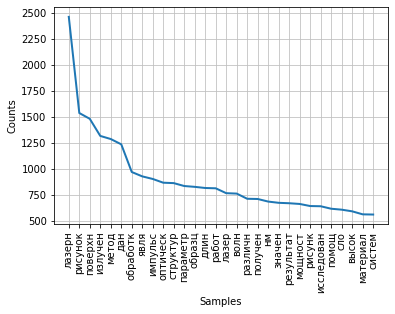

<Axes: xlabel='Samples', ylabel='Counts'>

In [224]:
fdist.plot(30,cumulative=False)

C:\Users\compf\AppData\Local\Temp\ipykernel_23888\1418074851.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['len'],color='g',shade=True)


KeyError: 0

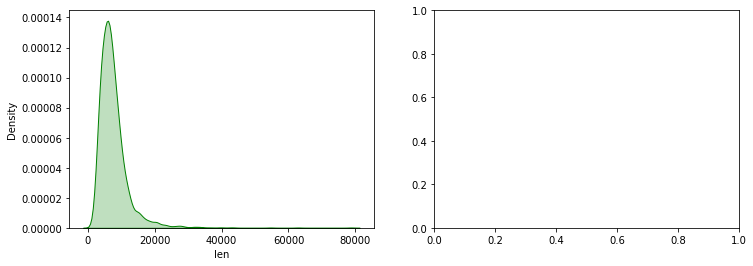

In [203]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.kdeplot(df['len'],color='g',shade=True)
plt.subplot(1,2,2)
sns.boxplot(df['len'])
plt.show()

In [237]:
print("Skew: {}".format(df['len'].skew()))
print("Kurtosis: {}".format(df['len'].kurtosis()))

Skew: 3.738040307625684
Kurtosis: 30.6480208973495


C:\Users\compf\AppData\Local\Temp\ipykernel_23888\32998713.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['len'],color='g',shade=True)


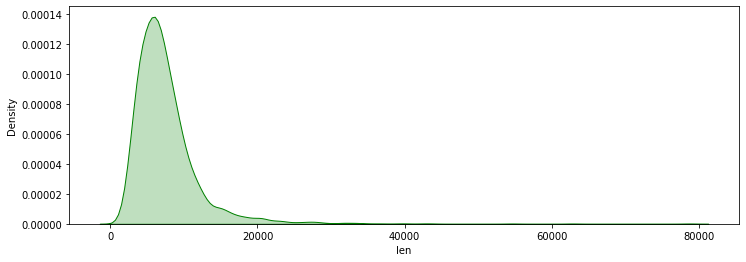

In [238]:
plt.figure(figsize=(12,4))
sns.kdeplot(df['len'],color='g',shade=True)
plt.show()

In [ ]:
def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]

In [ ]:
corpus=[]
new= df['stemmer_stopwords_removed']
new=new.values.tolist()
corpus=[word for i in new for word in i]

from collections import defaultdict
dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1

In [ ]:
import collections
counter=collections.Counter(corpus)
most=counter.most_common()

In [ ]:
# from nltk.util import ngrams
# from sklearn. feature_extraction. text import CountVectorizer
# top_n_bigrams=get_top_ngram(df['stemmer_stopwords_removed'])[:10] 
# x,y=map(list,zip(*top_n_bigrams)) 
# sns.barplot(x=y,y=x)

In [240]:
b

['факультет программной инженерии и компьютерной техники',
 'факультет технологического менеджмента и инноваций',
 'факультет безопасности информационных технологий',
 'факультет инфокоммуникационных технологий',
 'факультет систем управления и робототехники',
 'факультет информационных технологий и программирования',
 'факультет биотехнологий',
 'факультет энергетики и экотехнологий',
 'центр химической инженерии',
 'Институт дизайна и урбанистики',
 'факультет цифровых трансформаций',
 'образовательный центр Энергоэффективные инженерные системы',
 'институт международного развития и партнерства',
 'физический факультет',
 'факультет фотоники',
 'факультет экотехнологий',
 'центр прикладной оптики',
 'инженерно-исследовательский факультет',
 'научно-образовательный центр фотоники и оптоинформатики',
 'факультет наноэлектроники',
 'институт лазерных технологий',
 'институт Высшая инженерно-техническая школа',
 'высшая школа цифровой культуры',
 'институт перспективных систем передачи д

In [247]:
df_facult = pd.DataFrame()
lenght=[]
for s in b:
    l=0
    for d in df['len'].loc[df['institute'] == s]:
        l+=d
    lenght.append(l)
    

In [248]:
lenght

[4656521,
 8259469,
 2934274,
 2309542,
 2052568,
 1438108,
 1700379,
 1307918,
 817045,
 1103178,
 655468,
 600479,
 609288,
 284232,
 258435,
 523037,
 305887,
 311185,
 261130,
 298954,
 245632,
 180900,
 170237,
 111756,
 118081,
 25557,
 11735]

In [239]:
a = df['institute'].value_counts()
b = a.index.tolist() 

In [193]:
a

факультет программной инженерии и компьютерной техники            759
факультет технологического менеджмента и инноваций                669
факультет безопасности информационных технологий                  439
факультет инфокоммуникационных технологий                         401
факультет систем управления и робототехники                       352
факультет информационных технологий и программирования            314
факультет биотехнологий                                           207
факультет энергетики и экотехнологий                              159
центр химической инженерии                                        104
Институт дизайна и урбанистики                                     92
факультет цифровых трансформаций                                   91
образовательный центр Энергоэффективные инженерные системы         84
институт международного развития и партнерства                     68
физический факультет                                               49
факультет фотоники  

In [250]:
b

['факультет программной инженерии и компьютерной техники',
 'факультет технологического менеджмента и инноваций',
 'факультет безопасности информационных технологий',
 'факультет инфокоммуникационных технологий',
 'факультет систем управления и робототехники',
 'факультет информационных технологий и программирования',
 'факультет биотехнологий',
 'факультет энергетики и экотехнологий',
 'центр химической инженерии',
 'Институт дизайна и урбанистики',
 'факультет цифровых трансформаций',
 'образовательный центр Энергоэффективные инженерные системы',
 'институт международного развития и партнерства',
 'физический факультет',
 'факультет фотоники',
 'факультет экотехнологий',
 'центр прикладной оптики',
 'инженерно-исследовательский факультет',
 'научно-образовательный центр фотоники и оптоинформатики',
 'факультет наноэлектроники',
 'институт лазерных технологий',
 'институт Высшая инженерно-техническая школа',
 'высшая школа цифровой культуры',
 'институт перспективных систем передачи д

([<matplotlib.patches.Wedge at 0x2521efee130>,
 [Text(0.9375510306176732, 0.5753243128773013, 'факультет программной инженерии и компьютерной техники'),
  Text(-0.5333858066251159, 0.962028887971081, 'факультет технологического менеджмента и инноваций'),
  Text(-1.0634436921737178, -0.28122502302592334, 'факультет безопасности информационных технологий'),
  Text(-0.7022730629960209, -0.846647828196699, 'факультет инфокоммуникационных технологий'),
  Text(-0.19353644472568704, -1.0828405443845097, 'факультет систем управления и робототехники'),
  Text(0.25690717713293465, -1.0695787499467195, 'факультет информационных технологий и программирования'),
  Text(0.6271690320680335, -0.9036918751515065, 'факультет биотехнологий'),
  Text(0.9025395049347494, -0.6288262415263358, 'факультет энергетики и экотехнологий'),
  Text(1.0305055810527282, -0.3847833772646363, 'центр химической инженерии'),
  Text(1.0906618423054941, -0.14302708043858503, 'Институт дизайна и урбанистики')],
 [Text(0.5113

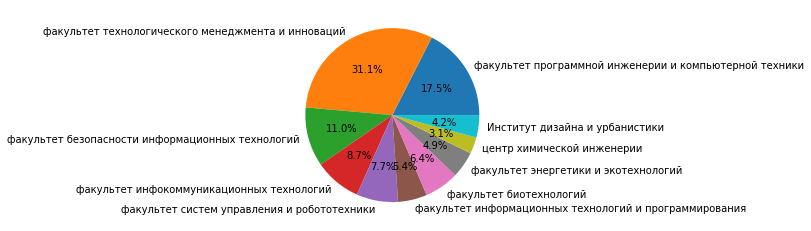

In [251]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.pie(lenght[:10], labels=b[:10], autopct='%1.1f%%')
# plt.legend(df['institute'].value_counts(), loc="best")